In [2]:
# Exploring data and visualization
# Create a linear regression model
# Evaluate model
# Make prediction
# Calculate Root Mean Square Error (RMSE)
# What if we consider more/less features?

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
house = pd.read_csv('house_data.csv')
#house.head()

In [6]:
# Data set information
#house.info()

In [7]:
# Columns in dataframe
#house.columns

In [15]:
# Display ten Sale price entries
# house['SalePrice'][1:11]

In [21]:
# Display highest sale price
# house['SalePrice'].max()

In [18]:
# Display LotArea series
#house['LotArea']

In [20]:
# Display highest LotArea among all
# house['LotArea'].max()

Text(0, 0.5, 'price of house')

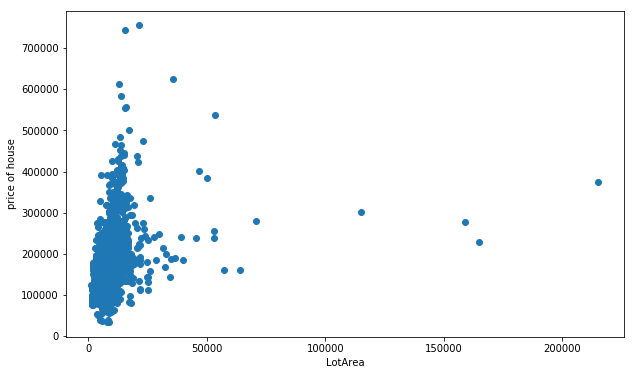

In [28]:
# Plot LotArea Vs SalePrice as scatter plot
plt.figure(figsize=(10,6)) # set figure size big
plt.scatter(house['LotArea'], house['SalePrice'])
plt.xlabel('LotArea')
plt.ylabel('price of house')

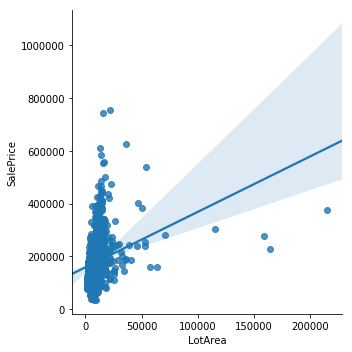

In [23]:
# linear regression line
sns.lmplot('LotArea', 'SalePrice', data=house)

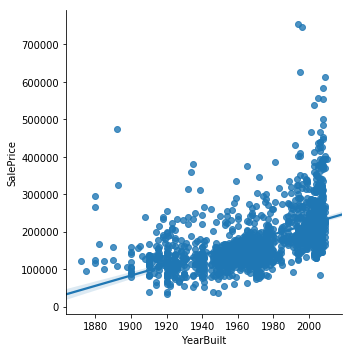

In [12]:
# YearBuilt Vs Price linear regression line
sns.lmplot('YearBuilt', 'SalePrice', data=house)

In [26]:
# Heatmap plot
# sns.heatmap(house.corr())
# plt.savefig("heatmap.png")

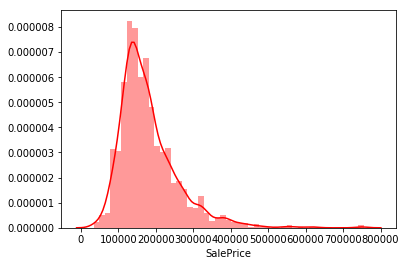

In [14]:
sns.distplot(house['SalePrice'], color='red')

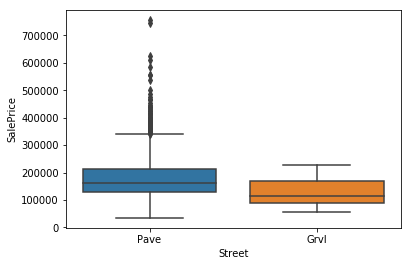

In [27]:
# Box plot
sns.boxplot(x='Street', y='SalePrice', data=house)

### Linear regression model

In [31]:
keep_col = [
    'LotFrontage',
    'LotArea',
    'LotShape',
    'YearBuilt',
    'GrLivArea',
    'FullBath',
    'BedroomAbvGr',
    'SalePrice'
]

feature = [
    'LotFrontage',
    'LotArea',
    'YearBuilt',
    'GrLivArea',
    'FullBath',
    'BedroomAbvGr'
]

house = house[keep_col].dropna()

X = house[feature]
y = house['SalePrice']

In [32]:
house.shape

(1201, 8)

In [33]:
y.shape

(1201,)

In [34]:
X.shape

(1201, 6)

In [35]:
# Train model in above 12 feature
# By default 75% training, 25% testing

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
# Split datasets into training and test data, here test data is 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

In [41]:
#print(X_train.shape, y_train.shape)
#print(X_test.shape, y_test.shape)

In [42]:
from sklearn.linear_model import LinearRegression

In [43]:
# Instantiate LinearRegression model
model = LinearRegression()

In [45]:
# Train linear regression model using fit() method
model.fit(X_train, y_train)

In [64]:
prediction = model.predict(X_test)

In [46]:
#prediction.shape

In [48]:
# predicted price of first house
prediction[0] 

### Evaluate Model

In [31]:
house1 = house.loc[1]
# Actual price of house1
house1['SalePrice']

181500

In [32]:
#Predicted price of house1
prediction[0]

136239.7816752249

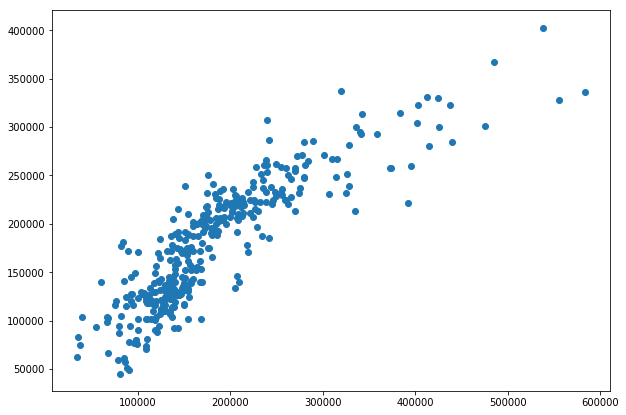

In [33]:
# To see how well model predicted price; plot predicted vs actual price
# y_test is actual prices 
plt.figure(figsize=(10,7))
plt.scatter(y_test, prediction)

### RMSE

In [34]:
# SKlearn has lib metrix which can be used to find mean square error

In [62]:
import numpy as np
from sklearn import metrics

In [65]:
# This is mean square error
mean_sq_error = metrics.mean_squared_error(y_test, prediction)

In [70]:
# Root mean square error is square root of mean square error
rmse = np.sqrt(mean_sq_error)
rmse

44324.001673417835

### Build another model with fewer feature and compare rmse with one above

In [50]:
df2 = pd.read_csv('train.csv')

In [51]:
keep_col = [
    'LotFrontage',
    'LotArea',
    'YearBuilt',
    'GrLivArea',
    'SalePrice'
]

feature = [
    'LotFrontage',
    'LotArea',
    'YearBuilt',
    'GrLivArea',
]

df2 = df2[keep_col].dropna()

X = df2[feature]
y = df2['SalePrice']

In [52]:
X.shape, y.shape

((1201, 4), (1201,))

In [53]:
X_train2, X_test2, y_train2, y_test2  = train_test_split(X, y, test_size=0.3, random_state=7)

In [54]:
print(X_train2.shape, y_train2.shape)
print(X_test2.shape, y_test2.shape)

(840, 4) (840,)
(361, 4) (361,)


In [55]:
model2 = LinearRegression()

In [56]:
model2.fit(X_train2, y_train2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [57]:
prediction2 = model2.predict(X_test2)

In [58]:
print("Actual price of house1 ", house['SalePrice'][0])
#print("Model-1 predicted price of house1 ", prediction[0])
#print("Actual price price of house1", df2['SalePrice'][0])
#print("Model-2 predicts price of house1", prediction2[0])


Actual price of house1  208500


In [73]:
#print("Actual price price of house1", df2.loc[0, 'SalePrice'])
#print("Actual price price of house1", df2['SalePrice'][0])
#print("Actual price price of house1", df2.SalePrice[0])
#print("Actual price price of house1", df2.iloc[0:1, 4:5])
#print("Row-1", df2.loc[0:0,:])
#print()
#print("Row-1", df2.iloc[0,:])

In [66]:
# mean square error for model-2
mean_sq_error2 = metrics.mean_squared_error(y_test2, prediction2)

In [67]:
rmse2 = np.sqrt(mean_sq_error2)

In [71]:
# comapring two rmse, more the number of feature minimize rmse
print("RMSE for model-1", rmse)
print("RMSE for model-2", rmse2)

RMSE for model-1 44324.001673417835
RMSE for model-2 46675.239241069714


### Cleaning dataset

In [76]:
df3 = pd.read_csv('train.csv', index_col=0)

In [77]:
# values by category types
df3.MSZoning.astype('category').values

[RL, RL, RL, RL, RL, ..., RL, RL, RL, RL, RL]
Length: 1460
Categories (5, object): [C (all), FV, RH, RL, RM]

In [78]:
# One hot encoding on 'MSZoing' series
# Purpose: 'MSZoing' feature type is string and can't be used to train linear regr mode (only int allowed).
# After one hot encoding each categorical value becomes a feature (column containing integer)
# Return: dataframe
df_MSZoning = pd.get_dummies(df3.MSZoning)
df_MSZoning.shape

(1460, 5)

In [79]:
# Merge 'df_MSZoning' with original dataframe
frames = [df3, df_MSZoning]
df3 = pd.concat(frames)
#df3.index
#df3.columns

/home/uib14108/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


In [58]:
keep_col = [
    'LotFrontage',
    'LotArea',
    'YearBuilt',
    'GrLivArea',
    'SalePrice'
]

feature = [
    'LotFrontage',
    'LotArea',
    'YearBuilt',
    'GrLivArea',
]

df3 = df3[keep_col].dropna()

X = df3[feature]
y = df3['SalePrice']